In [58]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# K-Means 알고리즘
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.model_selection import train_test_split

# CLustering 알고리즘의 성능 평가 측도
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score, rand_score,calinski_harabasz_score
from sklearn.metrics.cluster import contingency_matrix

from sklearn.preprocessing import StandardScaler  # 변수 표준화
from sklearn import metrics

# 국민건강검진 데이터 칼럼별 정보

```
기준년도            0
가입자 일련번호        0
시도코드            0
성별코드            성별 : 1(남자), 2(여자)
연령대 코드(5세단위)    9 : 40~44세
신장(5Cm단위)       검진자의 키(5CM 단위)  예) 100~104CM -> 100CM
체중(5Kg 단위)      0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기 혈압          0
이완기 혈압          0
식전혈당(공복혈당)      0
총 콜레스테롤         정상치는 150~250mg/dL 약 1/3이 비에스텔형(유리)콜레스테롤이며 나머지가 콜레스테롤에스테르
트리글리세라이드        단순지질 혹은 중성지질을 뜻함 정상치는 30~135mg/dL(0.34~1.52-mmol/ℓ) 
HDL 콜레스테롤       HDL(고밀도 리포단백질)에 포함되는 콜레스테롤작은 입자의 콜레스테롤로 
                  세포에 이끌려간 콜레스테롤을 간으로 돌려주고 혈관 벽에 쌓인 나쁜 콜레스테롤을 없애는 역할을 하는 성분정상치는 30~65mg/dL
LDL 콜레스테롤       DL(저밀도 리포단백질)에 함유된 콜레스테롤입자가 매우 큰 콜레스테롤로 양이 과도하게 증가할 경우,
                  혈관벽에 쌓여서 동맥경화나 각종 질병을 야기 하는 성분170mg/dL 이상일 경우 일반적으로 고LDL혈증으로 봄
혈색소             0
요단백             소변에 단백질이 섞여 나오는 것1(-), 2(±), 3(+1), 4(+2), 5(+3), 6(+4)로 표기됨
혈청크레아티닌         크레아티닌은 크레아틴의 탈수물로 내인성 단백대사의 종말산물로서 신장에서 배설되고 그 증감은 음식물에 관계없이 
                   근육의 발육과 운동에 관계함혈청크레아티닌 농도는 신기능장애에 의해 증량함정상치 0.8~1.7mg/dL
(혈청지오티)AST      간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌 , 근육 등에도 존재하는 효소로 
                  이러한 세포들이 손상을 받는 경우 농도가 증가함정상치 0~40IU/L
(혈청지오티)ALT      간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 
                  간세포가 손상을 받는 경우 농도가 증가함정상치 0~40IU/L
감마 지티피          간 기능을 나타내는 혈액검사상의 수치, 간 내의 쓸개관(담관)에 존재하는 효소로 글루타민산을 외부에 펩티드나 아미노산 등으로 
                  옮기는 작용을 함, 쓸개즙(담즙) 배설 장애, 간세포 장애 발생 시 혈중에 증가하게 됨정상치 남성 11~63IU/L, 여성 8~35IU/L
흡연상태            1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
음주여부            0(마시지 않는다), 1(마신다)
구강검진 수검여부     0(미수검), 1(수검)
치아우식증유무        0(없음), 1(있음)
치석              0(없음), 1(있음)
데이터 공개일자        0
```

# 데이터 불러오기

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./국민건강보험공단_건강검진정보_20211229.CSV',encoding='cp949')
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [75]:
df3 = pd.read_csv('./국민건강보험공단_건강검진정보_20211229.CSV',encoding='cp949')
df3[df3['연령대 코드(5세단위)']<9]['연령대 코드(5세단위)'].sum()

0

In [76]:
df= df[df['연령대 코드(5세단위)']==9]
df

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
5,2020,6,27,1,9,185,85,94.0,1.2,1.2,...,1.1,25.0,32.0,26.0,3.0,1.0,0,NaN,NaN,2021-12-29
6,2020,7,44,1,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,3.0,1.0,1,0.0,1.0,2021-12-29
25,2020,26,48,1,9,165,55,77.5,1.5,1.5,...,0.9,18.0,10.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
31,2020,32,27,2,9,155,60,67.0,1.2,1.0,...,0.7,35.0,66.0,30.0,1.0,1.0,0,NaN,NaN,2021-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999960,2020,999961,26,1,9,165,85,101.0,0.9,1.2,...,0.8,72.0,85.0,82.0,3.0,1.0,0,NaN,NaN,2021-12-29
999969,2020,999970,11,2,9,160,55,83.1,1.5,1.5,...,0.6,29.0,19.0,8.0,1.0,0.0,1,0.0,1.0,2021-12-29
999982,2020,999983,27,2,9,160,50,67.9,1.5,1.2,...,0.6,17.0,9.0,8.0,1.0,1.0,1,1.0,1.0,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29


# 결측치 없애주기

In [77]:
df.dropna(inplace=True)
df.isna().sum()

기준년도            0
가입자 일련번호        0
시도코드            0
성별코드            0
연령대 코드(5세단위)    0
신장(5Cm단위)       0
체중(5Kg 단위)      0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기 혈압          0
이완기 혈압          0
식전혈당(공복혈당)      0
총 콜레스테롤         0
트리글리세라이드        0
HDL 콜레스테롤       0
LDL 콜레스테롤       0
혈색소             0
요단백             0
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마 지티피          0
흡연상태            0
음주여부            0
구강검진 수검여부       0
치아우식증유무         0
치석              0
데이터 공개일자        0
dtype: int64

# bmi 컬럼 계산해서 추가하기

In [78]:
df['BMI'] = df['체중(5Kg 단위)']/((df['신장(5Cm단위)']/100)**2)
df['BMI']

6         29.384757
95        19.531250
107       20.202020
149       22.491349
155       25.711662
            ...    
999897    20.761246
999903    25.711662
999919    29.296875
999951    31.141869
999969    21.484375
Name: BMI, Length: 30578, dtype: float64

In [79]:
df['체중(5Kg 단위)']/((df['신장(5Cm단위)']/100)**2)

6         29.384757
95        19.531250
107       20.202020
149       22.491349
155       25.711662
            ...    
999897    20.761246
999903    25.711662
999919    29.296875
999951    31.141869
999969    21.484375
Length: 30578, dtype: float64

# 쌩 데이터로 relplot 만들어보기

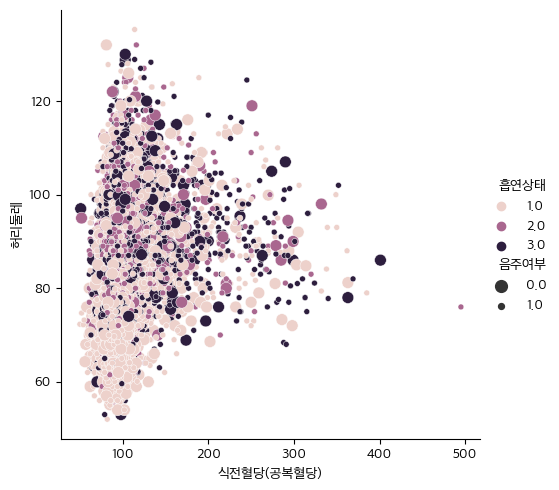

In [80]:
sns.palettes='husl'
%matplotlib inline
plt.rcParams['font.family']='Apple SD Gothic Neo'
sns.relplot(x='식전혈당(공복혈당)',y='허리둘레',hue='흡연상태',size='음주여부',data=df)


In [12]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXNonUnicode',
 'cmtt10',
 'cmb10',
 'DejaVu Serif Display',
 'STIXGeneral',
 'DejaVu Sans',
 'cmr10',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Sans Display',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'cmss10',
 'cmmi10',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeFiveSym',
 'cmsy10',
 'cmex10',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXIntegralsUpD',
 'Khmer Sangam MN',
 'Ayuthaya',
 'Symbol',
 'Noto Serif Ahom',
 'Noto Sans Lisu',
 'Al Nile',
 'Kohinoor Telugu',
 'Party LET',
 'Telugu Sangam MN',
 'Bangla MN',
 'Songti SC',
 'Herculanum',
 'Helvetica',
 'Damascus',
 'Noto Sans Lycian',
 '.SF Compact',
 'Comic Sans MS',
 'Avenir',
 'Kannada Sangam MN',
 'Bodoni Orna

# df에서 원하는 컬럼만 뽑아서 df1 데이터프레임 새로 만들어주기

In [81]:
df1 = pd.concat([df['식전혈당(공복혈당)'],df['허리둘레'],df['흡연상태'],df['음주여부'],df['성별코드'],df['BMI']],axis=1)
df1.reset_index(drop=['index'])

,식전혈당(공복혈당),허리둘레,흡연상태,음주여부,성별코드,BMI
0,250.0,93.0,3.0,1.0,1,29.384757
1,85.0,69.0,1.0,1.0,2,19.531250
2,106.0,70.0,1.0,1.0,2,20.202020
3,103.0,84.2,2.0,1.0,1,22.491349
4,86.0,85.0,1.0,1.0,1,25.711662
...,...,...,...,...,...,...
30573,95.0,87.0,3.0,1.0,1,20.761246
30574,85.0,92.0,3.0,1.0,1,25.711662
30575,100.0,96.5,3.0,1.0,1,29.296875
30576,142.0,94.0,2.0,1.0,1,31.141869


In [82]:
# 소수점 없애버리기
df1 = df1.round(0).astype(int)
df1

,식전혈당(공복혈당),허리둘레,흡연상태,음주여부,성별코드,BMI
6,250,93,3,1,1,29
95,85,69,1,1,2,20
107,106,70,1,1,2,20
149,103,84,2,1,1,22
155,86,85,1,1,1,26
...,...,...,...,...,...,...
999897,95,87,3,1,1,21
999903,85,92,3,1,1,26
999919,100,96,3,1,1,29
999951,142,94,2,1,1,31


# pairplot 과 회귀직선 그려서 상관관계 보기

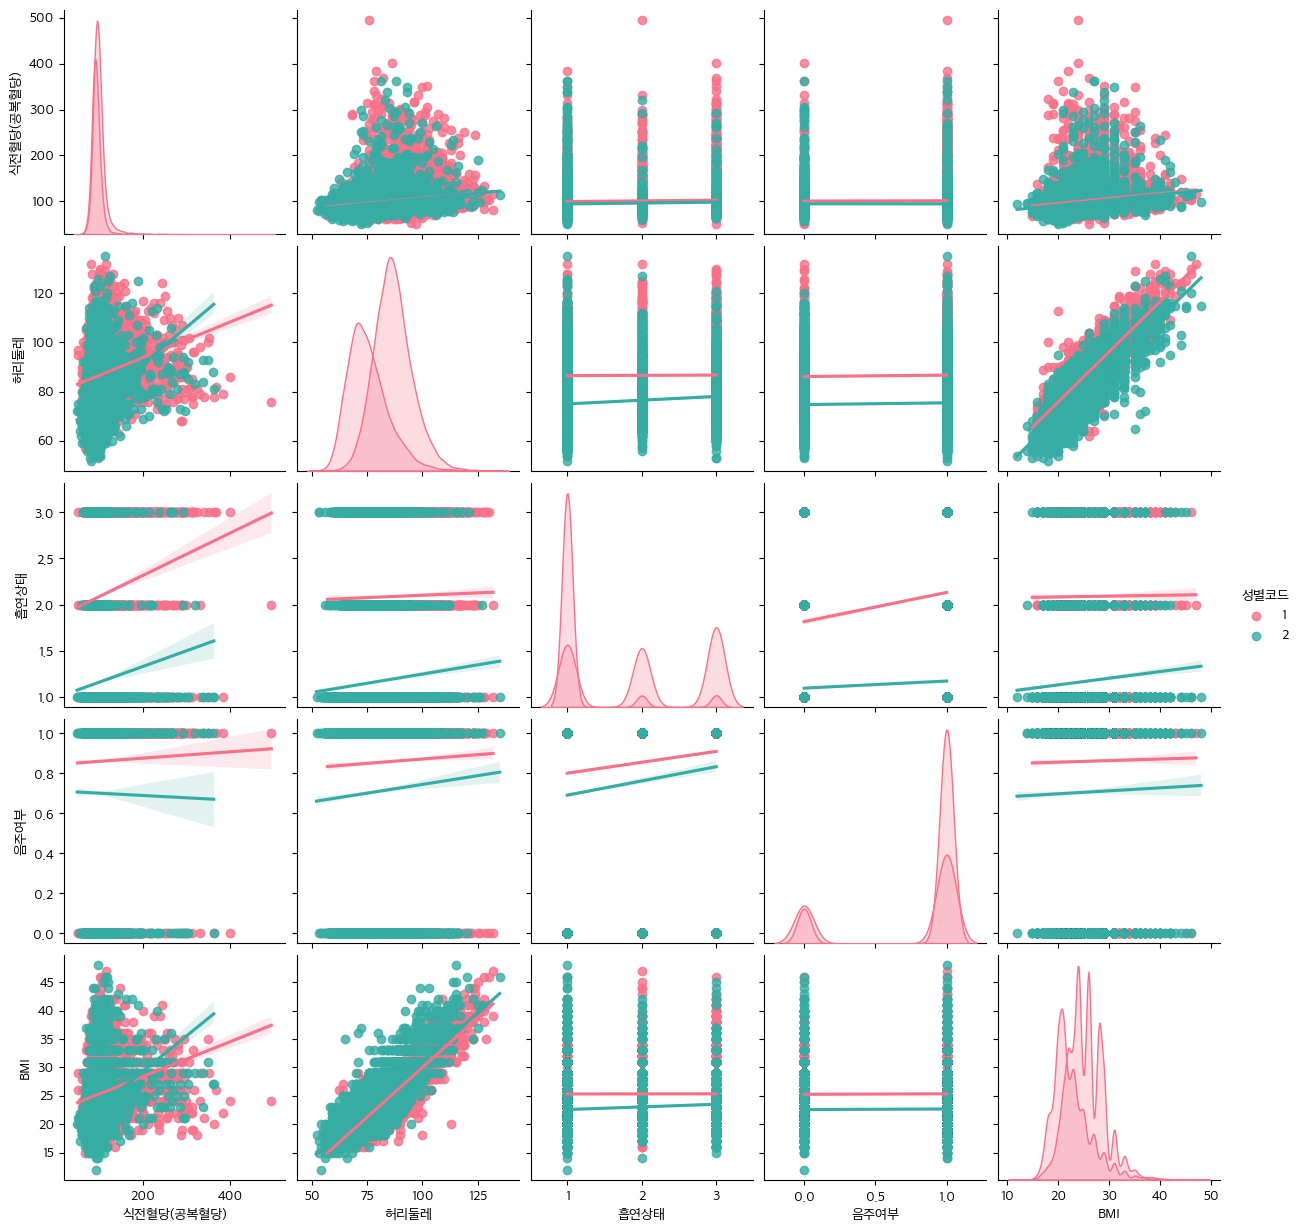

In [55]:
sns.pairplot(data=df1,kind='reg',hue='성별코드',palette='husl')

# kde도 그려서 밀도까지 한눈에 보기

/usr/local/anaconda3/envs/cakd7/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


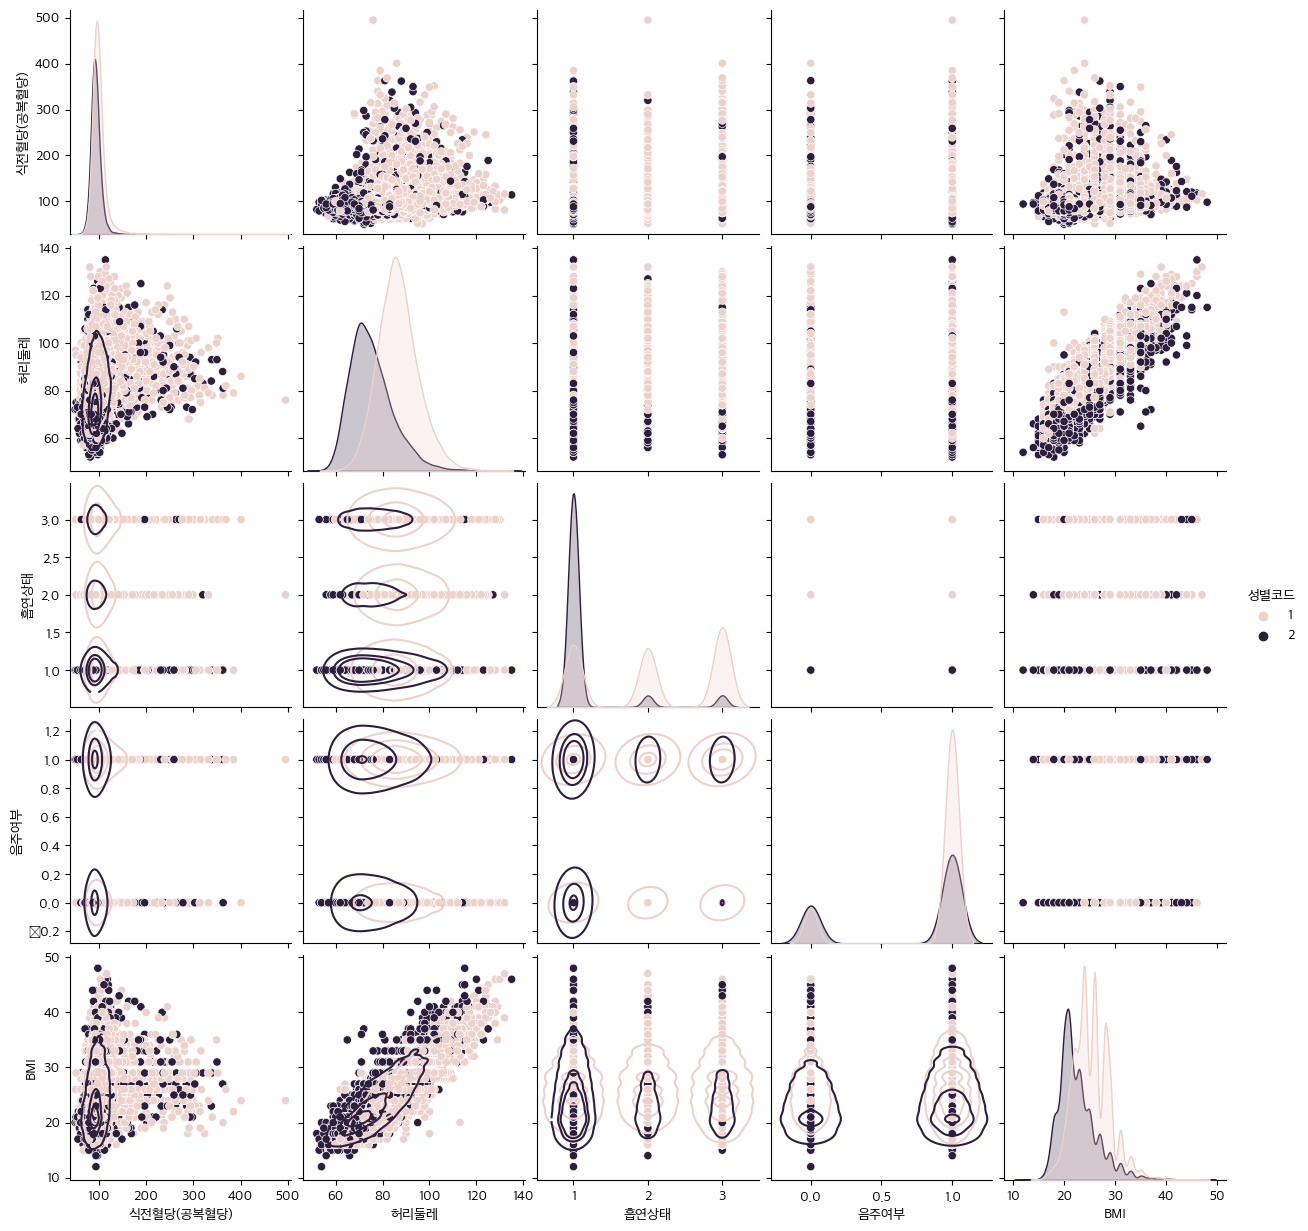

In [56]:
g = sns.pairplot(data=df1,diag_kind='kde',hue='성별코드')
g.map_lower(sns.kdeplot, levels=4, color=".2")

https://suy379.tistory.com/51

In [83]:
df2 = df1.copy()

In [84]:
sc = StandardScaler()
df2_scaled = sc.fit_transform(df2)
pd.DataFrame(df2_scaled)

,0,1,2,3,4,5
0,7.678251,1.050316,1.542765,0.509966,-0.846643,1.217841
1,-0.670851,-1.218704,-0.821406,0.509966,1.181135,-1.072968
2,0.391762,-1.124162,-0.821406,0.509966,1.181135,-1.072968
3,0.239960,0.199433,0.360680,0.509966,-0.846643,-0.563900
4,-0.620251,0.293976,-0.821406,0.509966,-0.846643,0.454238
...,...,...,...,...,...,...
30573,-0.164845,0.483061,1.542765,0.509966,-0.846643,-0.818434
30574,-0.670851,0.955774,1.542765,0.509966,-0.846643,0.454238
30575,0.088158,1.333944,1.542765,0.509966,-0.846643,1.217841
30576,2.213384,1.144859,0.360680,0.509966,-0.846643,1.726910


In [85]:
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit(df2_scaled)

In [86]:
print(clusters.labels_)

[3 2 2 ... 1 1 4]


In [101]:
df2['cluster']= clusters.labels_
df2.head()

,식전혈당(공복혈당),허리둘레,흡연상태,음주여부,성별코드,BMI,cluster
6,250,93,3,1,1,29,3
95,85,69,1,1,2,20,2
107,106,70,1,1,2,20,2
149,103,84,2,1,1,22,0
155,86,85,1,1,1,26,0


In [109]:
df2.reset_index(drop=['index'])
df2

,식전혈당(공복혈당),허리둘레,흡연상태,음주여부,성별코드,BMI,cluster
6,250,93,3,1,1,29,3
95,85,69,1,1,2,20,2
107,106,70,1,1,2,20,2
149,103,84,2,1,1,22,0
155,86,85,1,1,1,26,0
...,...,...,...,...,...,...,...
999897,95,87,3,1,1,21,0
999903,85,92,3,1,1,26,0
999919,100,96,3,1,1,29,1
999951,142,94,2,1,1,31,1


In [115]:
df2.groupby('cluster').mean()

,식전혈당(공복혈당),허리둘레,흡연상태,음주여부,성별코드,BMI
cluster,,,,,,
0,96.948015,82.559364,2.182805,0.983243,1.012758,23.550224
1,103.076084,95.766213,1.965201,0.863651,1.127808,29.601076
2,92.646059,73.543966,1.124261,1.000000,1.993227,21.842734
3,214.900433,90.733766,2.119048,0.779221,1.244589,27.400433
4,93.417908,75.884355,1.231483,0.000000,1.705279,22.423322


In [111]:
df2.groupby('cluster').count()

,식전혈당(공복혈당),허리둘레,흡연상태,음주여부,성별코드,BMI
cluster,,,,,,
0,10503,10503,10503,10503,10503,10503
1,6322,6322,6322,6322,6322,6322
2,8120,8120,8120,8120,8120,8120
3,462,462,462,462,462,462
4,5171,5171,5171,5171,5171,5171


In [116]:
from sklearn.decomposition import PCA
X = df2_scaled.copy()
pca =PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[ 4.2,  1.6],
       [-2.1, -0.5],
       [-1.8, -0.2],
       ...,
       [ 2.4, -0.4],
       [ 2.7,  0.9],
       [-1.7,  1.4]])

In [119]:
pca_df2 = pd.DataFrame(x_pca)
pca_df2['cluster'] = clusters.labels_
pca_df2.head()

,0,1,cluster
0,4.191445,1.635252,3
1,-2.140620,-0.489950,2
2,-1.818772,-0.166367,2
3,0.514392,-0.849520,0
4,0.404518,-0.044954,0


/usr/local/anaconda3/envs/cakd7/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


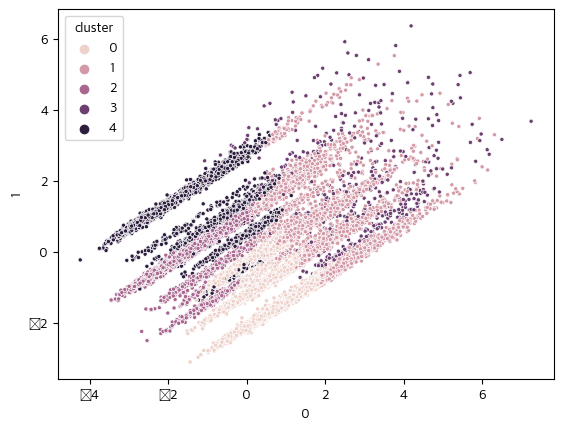

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(x=0,y=1,hue='cluster',data=pca_df2,marker='.')

In [98]:
pca_df.isnull().sum()

0              0
1              0
cluster    29639
dtype: int64